<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/Review/1%EC%A3%BC%EC%B0%A8_%EB%B3%B5%EC%8A%B5(11_28_~_12_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝
- AI 구현 방법 중 하나
- 컴퓨터가 데이터를 기반으로 학습하고 개선하도록 Training하는데 중점
- 정형데이터
- 딥러닝 -> 비정형 데이터

# 머신러닝 Algorithm
- Regression(회귀)
- SUM(Support Vector Machine)
- Decision Tree
- Naive Bayes
- KNN(K-Neorest Neightbors)
- ANN(Artificial Neural Network)
- Clustering(K-Means, DBSCAN)
- Reinforcement Learning(강화학습)

# 머신러닝 Type(Data의 형태)
- 지도학습(데이터와 정답이 같이 입력)
- 비지도학습(데이터만 입력)
- 준지도학습(지도 + 비지도)
- 강화 학습
- Feature(x_data, 입력데이터, 독립변수)
- Target(t_data, label, 종속변수)

# 편미분
- 독립변수가 여러개 일때, 미분하고자 하는 변수를 제외하고 나머지 변수를 상수 취급해서 미분
- ex) f(x,y) = 2x + 3xy + y^3의 경우,
- x에 대해 편미분 하면 2 + 3y
- y에 대해 편미분 하면 3x + 3y^2

# 11월 28일

## 일변수 함수의 수치미분 코드

In [ ]:
def numerical_derivative(f,x):
    # f: 미분하려는 함수
    # x: 미분값을 알고자하는 입력값
    # delta 값 정의
    delta_x = 1e-4

    # 중앙차분을 코드로 구현
    result = (f(x + delta_x) - f(x - delta_x)) / (2 * delta_x)
    return result

# 위 함수가 잘 작동하는 지 확인하기 위해 방정식 생성
def my_func(x):
    return x**2

# f'(5)의 값 구하기
numerical_derivative(my_func, 5)


9.999999999976694

# 다변수 함수의 수치미분 코드

In [ ]:
import numpy as np

def numerical_derivative(f,x):
    # f : 미분하려는 함수
    # x : 미분값을 알고자하는 입력값

    # delta_x의 값 정의
    delta_x = 1e-4

    # 미분 결과 저장할 배열
    derivative_x = np.zeros_like(x)

    # 반복 수행 위한 것
    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:
        idx = it.multi_index  # 현재의 index를 추출 -> tuple 형태로 반환

        tmp = x[idx]  # 현재 index의 값을 잠시 보존해야 함
                      # 밑에서 이 값을 변경해 중앙차분 값을 계산해야 하기 때문!
                      # but, 우리는 편미분을 해야하므로
                      # 다음 변수 편미분 시, 값을 원래대로 복원해야 편미분이 정상진행!
                      # 따라서, tmp에 잠시 보관했다 복원
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

In [ ]:
# 정상 작동 하는지 확인
def my_func(x):
    return x ** 2

# f'(3,0)을 구해보아요!
result = numerical_derivative(my_func, np.array([3.0]))
result

array([6.])

In [ ]:
# 위 2변수 함수를 다시 만들어보아요!
def my_func(input_data):
    x = input_data[0]
    y = input_data[1]

    # f(x) = 2x + 3xy + y^3
    return 2*x + 3*x*y + np.power(y,3)

result = numerical_derivative(my_func, np.array([1.0, 2.0]))
result

array([ 8.        , 15.00000001])

In [ ]:
# 4변수 함수에 대해서 수치미분을 해 보세요!
# f(w,x,y,z) = wx + xyz + 3w + zy^2
# 다변수 함수의 수치미분 실행
# f'(1.0, 2.0, 3.0, 4.0) 의 값은 얼마인가요?

# 수치미분 함수
def numerical_derivative(f,x):
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:
        idx = it.multi_index  # 현재의 index를 추출 -> tuple 형태로 반환

        tmp = x[idx]  # 현재 index의 값을 잠시 보존해야 함
                      # 밑에서 이 값을 변경해 중앙차분 값을 계산해야 하기 때문!
                      # but, 우리는 편미분을 해야하므로
                      # 다음 변수 편미분 시, 값을 원래대로 복원해야 편미분이 정상진행!
                      # 따라서, tmp에 잠시 보관했다 복원
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

def my_func(input_data):

    w = input_data[0,0]
    x = input_data[0,1]
    y = input_data[1,0]
    z = input_data[1,1]

    return w*x + x*y*z + 3*w + z*np.power(y,2)

data = np.array([[1.0, 2.0],
                 [3.0, 4.0]])
result = numerical_derivative(my_func, data)
result


array([[ 5., 13.],
       [32., 15.]])

# 11월 29일

# Regression(회귀)
- 조건부 평균을 구하는 방법 --> 평균을 구하는 식을 찾아내는 것
- 평균이 의미를 가지는 데이터에 대해 더 잘 구해짐

# Linear Regression(선형 회귀)
## 단순 선형 회귀 분석의 경우
- y = Wx + b의 공식을 가짐
- W => weight, 기울기, 가중치
- b = bias, 절편, 편향

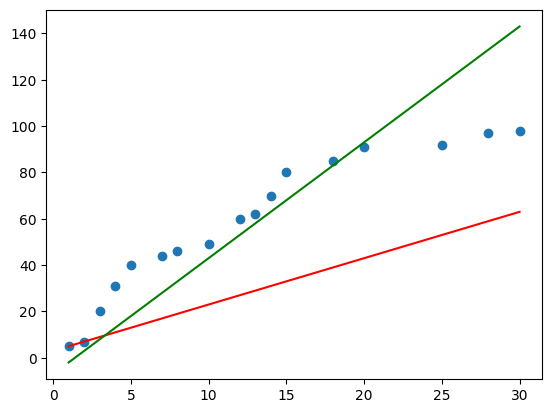

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})

df.head()

plt.scatter(df['공부시간(x)'], df['시험점수(t)'])
plt.plot(df['공부시간(x)'], df['공부시간(x)']*2 + 3, color='r' )
plt.plot(df['공부시간(x)'], df['공부시간(x)']*5 - 7, color='g')

# Loss Function
- 오차를 하나의 숫자로 계산하기 위한 함수
- 평균제곱오차(MSE)법 많이 사용(오차의 제곱의 평균)
- loss는 모든 데이터에 대한 평균 오차값이라 할 수 있음
- 오차 = t - y = t -(Wx + b)

# Python 코드로 구현

In [ ]:
import numpy as np

# Training Data Set
# 2차원 배열 형태
x_data = np.array([1,2,3,4,5]).reshape(5,1)
t_data = np.array([3,5,7,9,11]).reshape(5,1)

# model => y = Wx + b
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    input_W = input_data[0]
    input_b = input_data[1]

    # y = xW + B --> 코드 구현시에는 Wx가 아니라 xW로!
    y = np.dot(x_data,input_W) + input_b  # np.dot() -> 내적 계산(행렬곱)

    # 제곱한 뒤, 평균을 구하는 공식이므로 아래 순서가 맞음!
    return np.mean(np.power((t_data-y),2))

# 수치미분 함수
def numerical_derivative(f,x):
    # f : 미분하려는 함수
    # x : 미분값을 알고자하는 입력값

    # delta_x의 값 정의
    delta_x = 1e-4

    # 미분 결과 저장할 배열
    derivative_x = np.zeros_like(x)

    # 반복 수행 위한 것
    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:
        idx = it.multi_index  # 현재의 index를 추출 -> tuple 형태로 반환

        tmp = x[idx]  # 현재 index의 값을 잠시 보존해야 함
                      # 밑에서 이 값을 변경해 중앙차분 값을 계산해야 하기 때문!
                      # but, 우리는 편미분을 해야하므로
                      # 다음 변수 편미분 시, 값을 원래대로 복원해야 편미분이 정상진행!
                      # 따라서, tmp에 잠시 보관했다 복원
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# 학습이 다 종료되면(모델이 다 만들어지면)
# 예측작업을 해야 해요! 그래서 예측을 해주는 함수를 하나 정의
def predict(x):

    return np.dot(x,W) + b

# learning rate 정의
learning_rate = 1e-4

# 학습을 진행
for step in range(300000):

    # 현재 W는 2차원, b는 1차원
    # loss함수 안에 들어갈때는 ,1차원에 순서대로 들어가야 함
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    # 확인작업
    if step % 30000 == 0:
        print(f'W : {W}, b: {b}, loss: {loss_func(input_param)}')

W : [[0.56930028]], b: [0.70555493], loss: 25.249532772584416
W : [[1.99049953]], b: [1.0342997], loss: 0.00021415246518639362
W : [[1.99655462]], b: [1.01243893], loss: 2.8164903895560146e-05
W : [[1.99875052]], b: [1.00451103], loss: 3.7041918278095045e-06
W : [[1.99954687]], b: [1.00163594], loss: 4.871679004470935e-07
W : [[1.99983567]], b: [1.00059328], loss: 6.407134788246098e-08
W : [[1.99994041]], b: [1.00021516], loss: 8.426535524758875e-09
W : [[1.99997839]], b: [1.00007803], loss: 1.1082410982341793e-09
W : [[1.99999216]], b: [1.0000283], loss: 1.4575365267662206e-10
W : [[1.99999716]], b: [1.00001026], loss: 1.9169228912135852e-11


In [ ]:
# 예측결과 확인
predict_result = predict(np.array([7]).reshape(1,1))
predict_result


array([[14.99999651]])

# TensorFlow Keras 구현

In [ ]:
# 필요 라이브러리 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Training Data Set
x_data = np.array([1,2,3,4,5]).reshape(5,1)
t_data = np.array([3,5,7,9,11]).reshape(5,1)

# Model 생성
model = Sequential()
model.add(Flatten(input_shape=(1,)))
model.add(Dense(units=1,
                activation='linear'))

# Model이 완성되었으면 compile 옵션들을 설정해야 함
model.compile(optimizer=SGD(learning_rate=1e-2),
              loss='mse')

# Model의 학습
model.fit(x_data,
          t_data,
          epochs=5000,
          verbose=0)

In [ ]:
model.predict(np.array([[10]]))


1/1 [==============================] - 0s 51ms/step


array([[21.000032]], dtype=float32)

# sklearn 구현

In [ ]:
import numpy as np
from sklearn import linear_model

# Training Data Set
x_data = np.array([1,2,3,4,5]).reshape(5,1)
t_data = np.array([3,5,7,9,11]).reshape(5,1)

# model 생성
sklearn_model = linear_model.LinearRegression()

# model 학습
sklearn_model.fit(x_data,
                  t_data)
sklearn_model.predict(np.array([[10]]))

array([[21.]])

# 11월 30일
## ozone.csv 활용한 머신러닝

### Python 구현

In [ ]:
# 단순 선형회귀 분석을 진행 중이므로
# 독립변수는 1개만 사용(Temp)

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')
df.head()

training_data = df[['Temp', 'Ozone']]
training_data

training_data = training_data.dropna(how='any')
training_data

# Training Data Set 준비
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# 수치미분 코드
def numerical_derivative(f,x):
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:
        idx = it.multi_index

        tmp = x[idx]

        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# model을 만들어야 하는데
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    input_W = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data, input_W) + input_b
    return np.mean(np.power((t_data-y),2))

# 예측함수 생성
def predict(x):
    return np.dot(x,W) + b

# learning_rate 정의
learning_rate = 1e-4

# 학습진행
for step in range(300000):
    input_param = np.concatenate((W.ravel(), b.ravel()),axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func,input_param)

    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')

W : [[0.50193424]], b : [0.56577943], loss : 1274.2620028194424
W : [[0.71675493]], b : [-11.72421797], loss : 817.9381735599295
W : [[0.85934667]], b : [-22.99124358], loss : 775.5892525347864
W : [[0.99006165]], b : [-33.31981521], loss : 740.001192270895
W : [[1.1098891]], b : [-42.78809863], loss : 710.0946444142122
W : [[1.21973588]], b : [-51.46774903], loss : 684.9625748938122
W : [[1.32043329]], b : [-59.4244533], loss : 663.8427545319514
W : [[1.41274341]], b : [-66.71842713], loss : 646.0946414386648
W : [[1.49736482]], b : [-73.40487071], loss : 631.1799540513042
W : [[1.57493794]], b : [-79.5343865], loss : 618.6463456225041


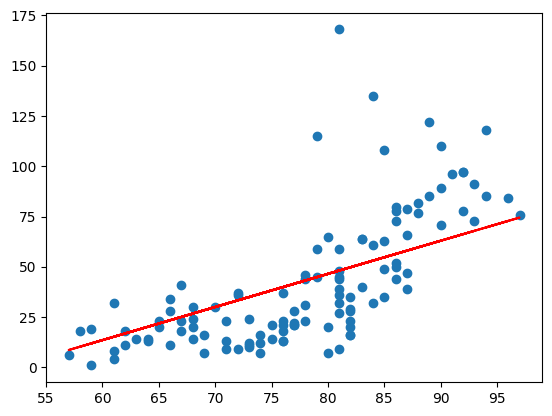

In [ ]:
# 학습 완료 후 예측, 온도가 62도 일때
predict(np.array([[62]]))

# 예측한 결과가 정확한지 알아보기 위해
# 그래프로 표현
# 독립변수가 1개 이므로 2차원 평면에 표현 가능
plt.scatter(x_data,t_data)
plt.plot(x_data, x_data*W.ravel()+b, color='r')
plt.show()

### Tensorflow 구현

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')
df.head()

training_data = df[['Temp', 'Ozone']]
training_data

training_data = training_data.dropna(how='any')
training_data

# Training Data Set 준비
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성
model = Sequential()
model.add(Flatten(input_shape=(1,)))
model.add(Dense(units=1,
                activation='linear'))

# model 설정
model.compile(optimizer=SGD(learning_rate = 1e-4),
              loss='mse')

# # model 학습
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)


1/1 [==============================] - 0s 31ms/step


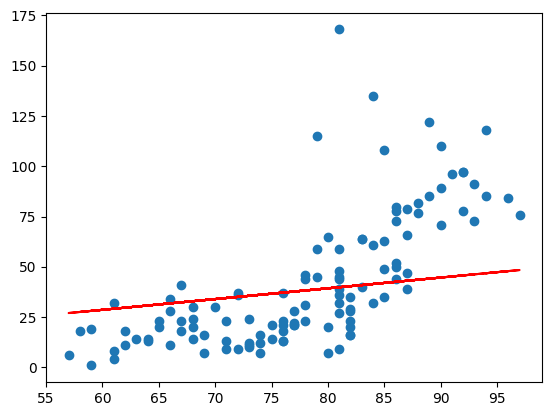

In [ ]:
# 학습 완료 후 예측 및 그래프 검증
model.predict(np.array([[62]]))

# 그래프 그려보기 위해 W,b 필요
weight, bias = model.get_weights()
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*weight + bias, color='r')
plt.show()

### sklearn 구현

[[3.58411393]]


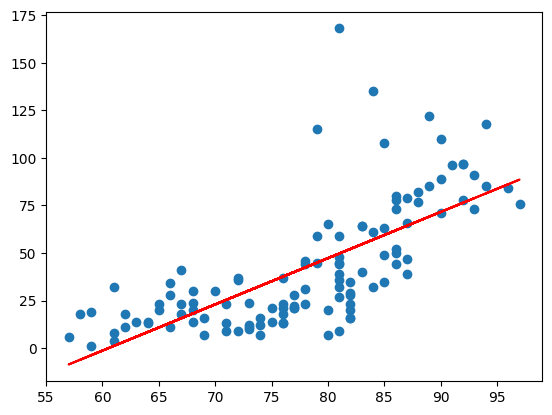

In [ ]:
from sklearn import linear_model

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')
df.head()

training_data = df[['Temp', 'Ozone']]
training_data

training_data = training_data.dropna(how='any')
training_data

# Training Data Set 준비
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성 & 학습
sklearn_model = linear_model.LinearRegression()
sklearn_model.fit(x_data, t_data)

# W,b값 구하기
weights = sklearn_model.coef_
bia = sklearn_model.intercept_

# 예측 및 그래프 그리기
print(sklearn_model.predict(np.array([[62]])))

plt.scatter(x_data,t_data)
plt.plot(x_data, x_data*weights+bia, color='r')
plt.show()


### 위 그래프에서 결과가 다 다른 이유!!
### 이상치 때문 이므로, 이상치를 제거할 필요 있음

### 1. Tuckey Fence 방식

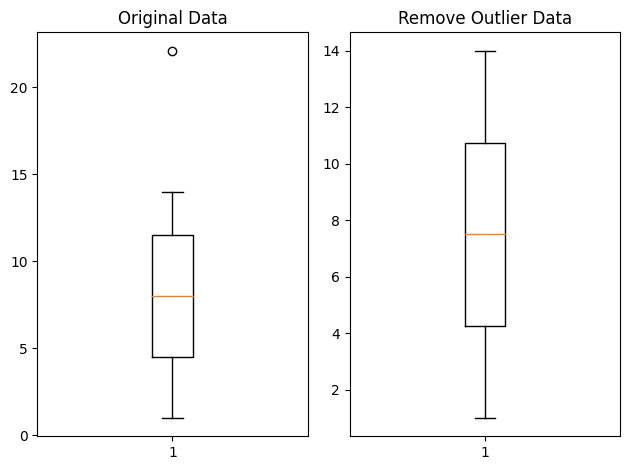

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

fig = plt.figure()
fig_1 = fig.add_subplot(1,2,1)
fig_2 = fig.add_subplot(1,2,2)

# 중위값, 1사분위, 3사분위
np.median(data)
np.percentile(data,25)
np.percentile(data,75)

# IQR value(3사분위 - 1사분위)
iqr_value = np.percentile(data,75) - np.percentile(data,25)

# 기준치 정하기(upper_fence, lower_fence)
upper_fence = np.percentile(data,75) + 1.5*iqr_value
lower_fence = np.percentile(data,25) - 1.5*iqr_value

# 위 기준 data에 적용
result = data[(data<=upper_fence) & (data >= lower_fence)]
result

# 이상치 제거 전후 그래프로 그리기
fig_1.set_title('Original Data')
fig_1.boxplot(data)

fig_2.set_title('Remove Outlier Data')
fig_2.boxplot(result)

plt.tight_layout()
plt.show()

### 2. zscore(정규분포) 방식

In [ ]:
# 이 방식을 이용하려면
# 기본적으로 우리 데이터를 정규분포화 시켜서 우리 데이터에 대한
# z-score값을 각각 구해야 되요!
# 그리고 기준치를 설정한 다음 그 기준치를 넘는 데이터를 이상치로 판별
from scipy import stats

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

zscore_threshold = 2.0
outlier = data[np.abs(stats.zscore(data))>zscore_threshold]
data[np.isin(data,outlier, invert=True)]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

### 이상치 제거한 데이터 적용해서 다시 구현하기!

In [ ]:
# 이상치 사전에 제거하면 이용하기 편리
# 종속변수인 Ozone에 대해서만 처리
import numpy as np
import pandas as pd
from scipy import stats

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')

training_data = df[['Temp', 'Ozone']]

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
training_data = training_data.dropna(how='any')

# 2. 이상치 처리!
zscore_threshold = 1.8
outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values))> zscore_threshold]
training_data = training_data.loc[np.isin(training_data['Ozone'], outlier, invert=True)]

# Training Data Set 준비
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

### Python 방식

In [ ]:
# 수치미분 코드
def numerical_derivative(f,x):
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:
        idx = it.multi_index

        tmp = x[idx]

        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# model을 만들어야 하는데
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    input_W = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data, input_W) + input_b
    return np.mean(np.power((t_data-y),2))

# 예측함수 생성
def predict(x):
    return np.dot(x,W) + b

# learning_rate 정의
learning_rate = 1e-4

# 학습진행
for step in range(300000):
    input_param = np.concatenate((W.ravel(), b.ravel()),axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func,input_param)

    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')

# 예측
predict(np.array([[62]]))

W : [[0.51192471]], b : [0.42989176], loss : 535.4395616190064
W : [[0.62937681]], b : [-10.18990722], loss : 455.84733370839075
W : [[0.75329018]], b : [-19.91678219], loss : 424.2844482094397
W : [[0.86678722]], b : [-28.82600175], loss : 397.8049740387367
W : [[0.97074352]], b : [-36.98629922], loss : 375.59019420596445
W : [[1.06596111]], b : [-44.46063009], loss : 356.9532514977507
W : [[1.15317456]], b : [-51.30665771], loss : 341.31791159686304
W : [[1.23305672]], b : [-57.57719818], loss : 328.20074653156274
W : [[1.30622387]], b : [-63.32062781], loss : 317.1961876002398
W : [[1.37324049]], b : [-68.5812563], loss : 307.9639856213891


array([[15.547026]])

### Tensorflow 구현

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# model 생성
model = Sequential()

model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                     activation='linear')

model.add(output_layer)

# model 설정
model.compile(optimizer=SGD(learning_rate=1e-4),
              loss='mse')

# model 학습
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)
print(model.predict(np.array([[62]])))  # [[37.21062]]

# 그래프로 확인해 보아요!
# W와 b가 필요해요!
weights, bias = output_layer.get_weights()

1/1 [==============================] - 0s 58ms/step
[[25.441444]]


In [ ]:
from sklearn import linear_model

# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# 예측을 해 보아요!
sklearn_model.predict(np.array([[62]]))

array([[4.51299041]])

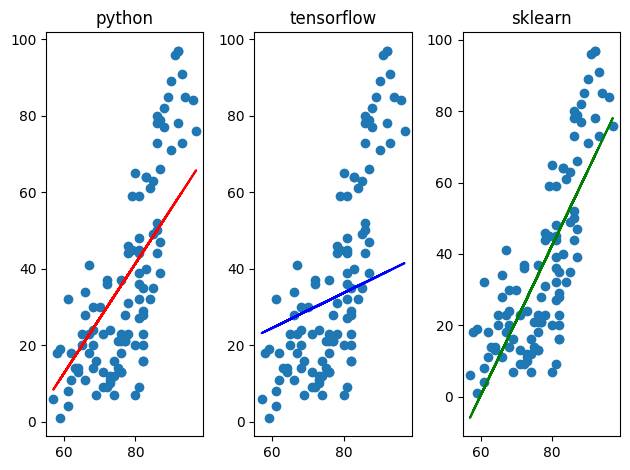

In [ ]:
####### 결과를 그래프로 확인해 보아요! #########

fig = plt.figure()

fig_python = fig.add_subplot(1,3,1)
fig_tensorflow = fig.add_subplot(1,3,2)
fig_sklearn = fig.add_subplot(1,3,3)

fig_python.set_title('python')
fig_tensorflow.set_title('tensorflow')
fig_sklearn.set_title('sklearn')

fig_python.scatter(x_data, t_data)
fig_python.plot(x_data, x_data*W.ravel() + b, color='r')

fig_tensorflow.scatter(x_data, t_data)
fig_tensorflow.plot(x_data, x_data*weights + bias, color='b')

fig_sklearn.scatter(x_data, t_data)
fig_sklearn.plot(x_data,
                 x_data*sklearn_model.coef_ + sklearn_model.intercept_,
                 color='g')

plt.tight_layout()
plt.show()

# 12월 1일
- 정규화
- MinMaxScaler, Standardization


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')

training_data = df[['Temp', 'Ozone']]

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
training_data = training_data.dropna(how='any')
# 2. 이상치 처리!
zscore_threshold = 1.8

outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]

# print(outlier)

# 이상치를 제거한 결과를 얻어야 해요!
# 내가 가진 DataFrame에서 이상치를 제거하면 되요!
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]

# 3. 정규화 진행!
#    모든 feature에 대해 scale을 0과 1로 변경!
#    이렇게 해야 해요!
#    프로그램적으로 이 작업을 하려면 코드작업을 해야해서 좀 그래요!
#    sklearn을 이용하면 이 정규화 작업을 아주 쉽게 할 수 있어요!
scaled_x = MinMaxScaler()
scaled_t = MinMaxScaler()

scaled_x.fit(training_data['Temp'].values.reshape(-1,1))
scaled_t.fit(training_data['Ozone'].values.reshape(-1,1))

# Training Data Set 준비
x_data = scaled_x.transform(training_data['Temp'].values.reshape(-1,1))
t_data = scaled_t.transform(training_data['Ozone'].values.reshape(-1,1))

### Python 구현

In [ ]:
# Python 직접구현

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 수치미분 코드
def numerical_derivative(f,x):

    # f : 미분하려고하는 다변수 함수
    # x : 모든 변수를 포함하는 ndarray  [1.0 2.0]
    # 리턴되는 결과는 [8.0 15.0]

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   #  [0.0 0.0]

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index  # 현재의 index를 추출 => tuple형태로 리턴.

        tmp = x[idx]    # 현재 index의 값을 일단 잠시 보존해야해요!
                        # 밑에서 이 값을 변경해서 중앙차분 값을 계산해야 해요!
                        # 그런데 우리 편미분해야해요. 다음 변수 편미분할때
                        # 원래값으로 복원해야 편미분이 정상적으로 진행되기 때문에
                        # 이값을 잠시 보관했다가 원상태로 복구해야 해요!
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x) # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Model을 만들어야 하는데.. y = Wx + b
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function(MSE)
def loss_func(input_data):

    input_w = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data, input_w) + input_b

    return np.mean(np.power((t_data-y),2))

# 모델이 완성된 후 예측하는 함수를 하나 만들어요!
def predict(x):

    return np.dot(x, W) + b

# learning rate 정의(hyperparameter)
learning_rate = 1e-4

# 학습진행
for step in range(300000):

    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')

# 지금 만들어진 모델은 scaling 되어 있으므로 알고싶은 예측값도
# scaling 시켜서 넣어줘야함
my_data = np.array([[62]])
scaled_my_data = scaled_x.transform(my_data)
scaled_result = predict(scaled_my_data)

# 다시 원상복귀
result = scaled_t.inverse_transform(scaled_result)  # inverse_transform -> 정규화된 값을 원래 값으로 변경
result

W : [[0.36444711]], b : [0.60226722], loss : 0.21487404377959732
W : [[0.35414561]], b : [0.20508044], loss : 0.04350244489738204
W : [[0.47457951]], b : [0.14081664], loss : 0.03725538076155974
W : [[0.56729125]], b : [0.09149669], loss : 0.03355830855892176
W : [[0.63861386]], b : [0.05355521], loss : 0.031370332503059456
W : [[0.69348191]], b : [0.02436706], loss : 0.030075459436306174
W : [[0.73569157]], b : [0.00191279], loss : 0.029309136489347364
W : [[0.76816321]], b : [-0.01536114], loss : 0.028855616469421582
W : [[0.79314345]], b : [-0.02864988], loss : 0.02858721734436631
W : [[0.81236059]], b : [-0.03887282], loss : 0.02842837520473545


array([[6.43897028]])

In [ ]:
### tensorflow 구현
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Model 생성
model = Sequential()

model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                     activation='linear')

model.add(output_layer)

# model 설정
model.compile(optimizer=SGD(learning_rate=1e-2),
              loss='mse')

# model 학습
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)

# 학습이 끝났으니 예측하기
my_data = np.array([[62]])
scaled_my_data = scaled_x.transform(my_data)
scaled_result = model.predict(scaled_my_data)

result = scaled_t.inverse_transform(scaled_result)
print(result)

# W,b의 값
weights, bias = output_layer.get_weights()

1/1 [==============================] - 0s 35ms/step
[[4.729635]]


###sklearn 구현

In [ ]:
# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# 학습이 끝났으니 예측을 해 보아요!
my_data = np.array([[62]])
scaled_my_data = scaled_x.transform(my_data)
scaled_result = sklearn_model.predict(scaled_my_data)
# 다시 원상 복귀시켜야 겠죠.
result = scaled_t.inverse_transform(scaled_result)
print(result)

[[4.51299041]]


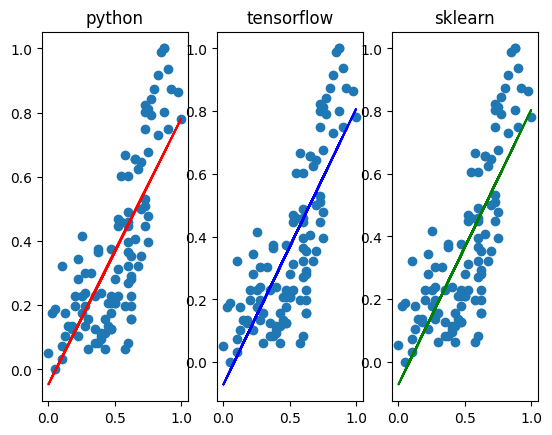

In [ ]:
####### 결과를 그래프로 확인해 보아요! #########

fig = plt.figure()

fig_python = fig.add_subplot(1,3,1)
fig_tensorflow = fig.add_subplot(1,3,2)
fig_sklearn = fig.add_subplot(1,3,3)

fig_python.set_title('python')
fig_tensorflow.set_title('tensorflow')
fig_sklearn.set_title('sklearn')

fig_python.scatter(x_data, t_data)
fig_python.plot(x_data, x_data*W.ravel() + b, color='r')

fig_tensorflow.scatter(x_data, t_data)
fig_tensorflow.plot(x_data, x_data*weights + bias, color='b')

fig_sklearn.scatter(x_data, t_data)
fig_sklearn.plot(x_data,
                 x_data*sklearn_model.coef_ + sklearn_model.intercept_,
                 color='g')

### 단순 선형 회귀 구현해봤으니
### 다중 선형 회귀도 구현해보자!!
### Multiple Linear Regression

In [ ]:
# 필요한 module import
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

In [ ]:
# 데이터 전처리
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')
training_data = df[['Solar.R', 'Wind', 'Temp', 'Ozone']]

# 결측치 제거
training_data = training_data.dropna(how='any')

# 이상치 제거
zscore_threshold = 1.8
outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]
training_data = training_data.loc[np.isin(training_data['Ozone'], outlier, invert=True)]

x_data = training_data.drop('Ozone',axis=1,inplace=False).values
t_data = training_data['Ozone'].values.reshape(-1,1)

# 정규화 진행
scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()

scaler_x.fit(x_data)
scaler_t.fit(t_data)

x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_t.transform(t_data)

###Tensorflow 구현

In [ ]:
# Model 생성
keras_model = Sequential()
keras_model.add(Flatten(input_shape=(3,)))
keras_model.add(Dense(units=1,
                       activation='linear'))

# Model 설정
keras_model.compile(optimizer=SGD(learning_rate=1e-2),
                    loss='mse')

# Model 학습 - 정규화된 데이터를 넣어줘야함!!
keras_model.fit(x_data_norm,
                t_data_norm,
                epochs=1000,
                verbose=0)

my_data = np.array([[150.0, 10.0, 80.0]])
scaled_my_data = scaler_x.transform(my_data)
scaled_result = keras_model.predict(scaled_my_data)
result = scaled_t.inverse_transform(scaled_result)

print(f'결과로 알아낸 오존량은 : {result}')

1/1 [==============================] - 0s 36ms/step
결과로 알아낸 오존량은 : [[39.917137]]


In [ ]:
### sklearn 구현

# model 생성
sklearn_model = linear_model.LinearRegression()

# model 학습
sklearn_model.fit(x_data,t_data)

# model로 예측
my_data = np.array([[150.0, 10.0, 80.0]])
result = sklearn_model.predict(my_data)

print(f'결과로 알아낸 오존량은 : {result}')

결과로 알아낸 오존량은 : [[40.34973385]]


In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn import linear_model

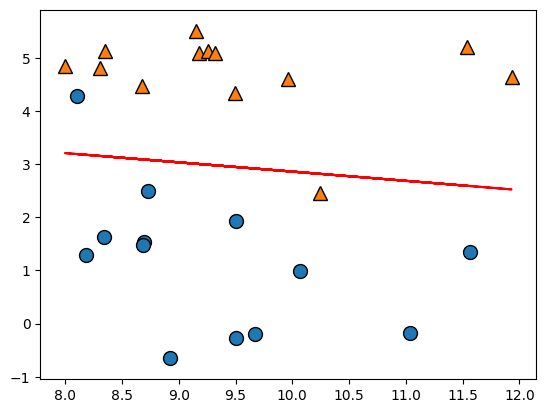

In [ ]:
x,t = mglearn.datasets.make_forge()

# 이 데이터를 2차원 평면에 점을 찍어서 표현을 해 볼꺼예요!
# x 안에 있는 2개의 값을 각각 x축의 값, y축의 값으로 이용
# 그리고 각 데이터의 target(정답)의 값이 0이면 네모, 1이면 동글
# 이렇게 표현을 할 꺼예요!

mglearn.discrete_scatter(x[:,0], x[:,1],t)

# 이제 이 데이터를 이용해 linear regression model 구현
model = linear_model.LinearRegression()
model.fit(x[:,0].reshape(-1,1),
          x[:,1].reshape(-1,1))
# 이렇게 학습을 시키면 우리의 모델이 완성
# W와 b를 구할 수 있어요!
plt.plot(x[:,0], x[:,0]*model.coef_.ravel() + model.intercept_,
         color='r')

[[0.63265306]]


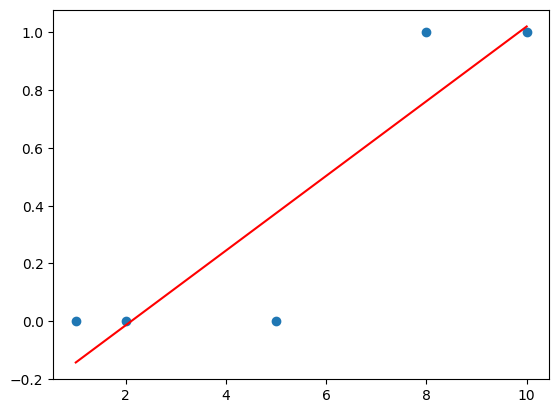

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Training Data Set
x_data = np.array([1,2,5,8,10])  # 공부시간
t_data = np.array([0,0,0,1,1]) # 합격여부

# simple linear regression을 해 보아요!
# 항상 2차원 배열 형태로 넣어줘야하는 것 주의!
model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1,1),
          t_data.reshape(-1,1))

print(model.predict(np.array([[7]])))

plt.scatter(x_data,t_data)
plt.plot(x_data, x_data*model.coef_.ravel() + model.intercept_,
         color='r')

[[0.41831972]]


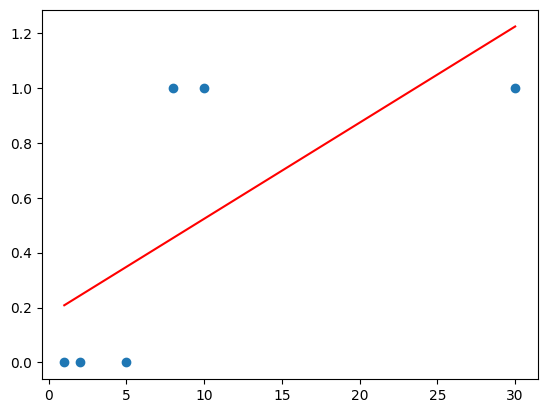

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Training Data Set
x_data = np.array([1,2,5,8,10,30])  # 공부시간
t_data = np.array([0,0,0,1,1,1]) # 합격여부

# simple linear regression을 해 보아요!
model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1,1),
          t_data.reshape(-1,1))

print(model.predict(np.array([[7]]))) # [[0.41831972]]

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_,
         color='r')
plt.show()

In [ ]:
# Logistic Regression을 구현해 보아요!
# sklearn과 tensorflow를 이용해서 구현할꺼예요!
# 간단한 데이터를 이용해서 모델을 완성하고 예측을 해 보아요!

import numpy as np
from sklearn import linear_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Training Data Set
# 공부시간에 따른 시험합격여부
x_data = np.arange(2,21,2).reshape(-1,1)
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1,1)

# sklearn 구현
sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data,t_data.ravel())  # logistic 회귀에서의 fit 모델은 1차원 배열을 필요로 함!!

study_hour = np.array([[13]])
result = sklearn_model.predict(study_hour)
print(result)  # 결과가 0,1로 나옴

# 확률을 알고싶으면
result_proba = sklearn_model.predict_proba(study_hour)
result_proba

# tensorflow 구현
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(1,)))

keras_model.add(Dense(units=1,
                      activation='sigmoid'))

keras_model.compile(optimizer=SGD(learning_rate=1e-2),
                    loss='binary_crossentropy')

keras_model.fit(x_data,
                t_data,
                epochs=500,
                verbose=0)

keras_result = keras_model.predict(study_hour)
print(keras_result)

[0]
1/1 [==============================] - 0s 30ms/step
[[0.5998916]]
